# **Clustering**

Clustering is an unsupervised machine learning technique used to group similar data points together. It is a fundamental task in exploratory data analysis and can help identify patterns, structure, and relationships within a dataset. Clustering algorithms aim to partition the data into distinct groups, or clusters, based on the similarity or proximity of the data points to each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn.datasets

In [3]:
n_samples = 1000
noisy_circles = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)

blobs = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=170)

no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = sklearn.datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.0, 0.5],
                             random_state=random_state)

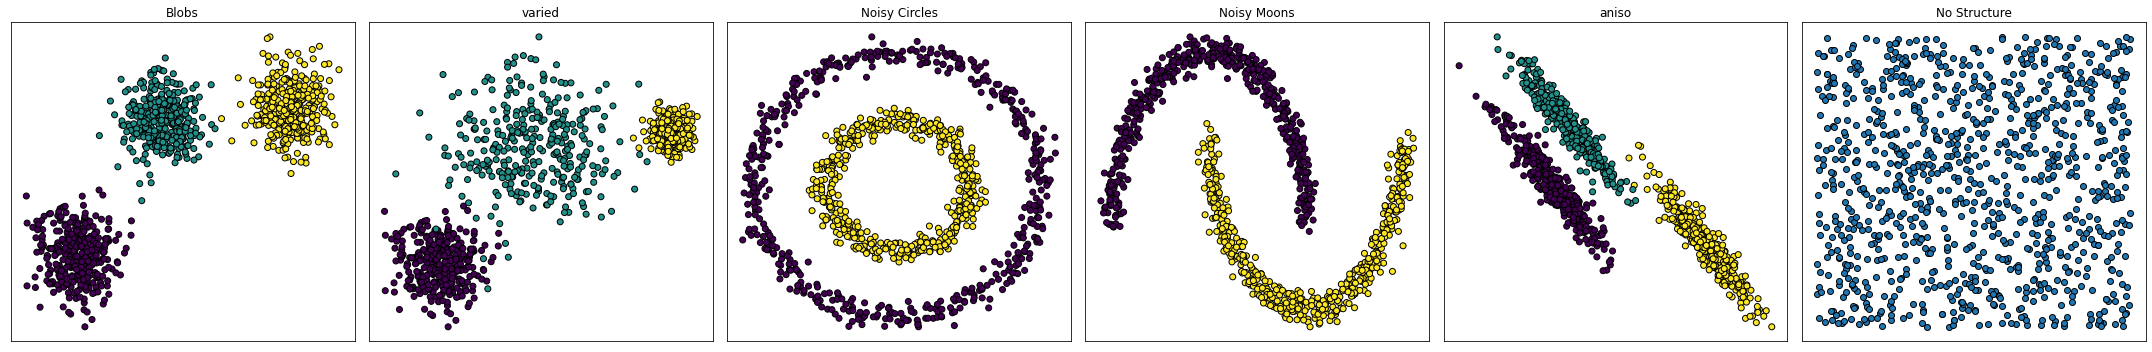

In [4]:
dummydat = [blobs, varied, noisy_circles, noisy_moons, aniso, no_structure]
titles = ['Blobs', 'varied', 'Noisy Circles', 'Noisy Moons', 'aniso', 'No Structure']

# Plotting the dummydat in subplots
fig, axes = plt.subplots(1, len(dummydat), figsize=(30, 5))

for ax, dataset, title in zip(axes, dummydat, titles):
    X, y = dataset
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [26]:
blobsdf = pd.DataFrame({
    'Feature 1': blobs[0][:, 0],
    'Feature 2': blobs[0][:, 1],
    'Cluster': blobs[1]
})

varieddf = pd.DataFrame({
    'Feature 1': varied[0][:, 0],
    'Feature 2': varied[0][:, 1],
    'Cluster': varied[1]
})

noisy_circlesdf = pd.DataFrame({
    'Feature 1': noisy_circles[0][:, 0],
    'Feature 2': noisy_circles[0][:, 1],
    'Cluster': noisy_circles[1]
})

noisy_moonsdf = pd.DataFrame({
    'Feature 1': noisy_moons[0][:, 0],
    'Feature 2': noisy_moons[0][:, 1],
    'Cluster': noisy_moons[1]
})

anisodf = pd.DataFrame({
    'Feature 1': aniso[0][:, 0],
    'Feature 2': aniso[0][:, 1],
    'Cluster': aniso[1]
})

no_structuredf = pd.DataFrame({
    'Feature 1': no_structure[0][:, 0],
    'Feature 2': no_structure[0][:, 1],
    'Cluster': no_structure[1]
})
# Display the DataFrame


In [27]:
Xblobs = blobsdf[['Feature 1', 'Feature 2']]
Xvaried = varieddf[['Feature 1', 'Feature 2']]
Xcircle = noisy_circlesdf[['Feature 1', 'Feature 2']]
Xmoons = noisy_moonsdf[['Feature 1', 'Feature 2']]
Xaniso = anisodf[['Feature 1', 'Feature 2']]
Xbox = no_structuredf[['Feature 1', 'Feature 2']]

In [ ]:
[Xblobs,Xvaried,Xcircle,Xmoons,Xaniso,Xbox]

# **Evaluation on Clustering**

1. **Silhouette Score**: The silhouette score measures how close each sample in one cluster is to samples in neighboring clusters. It ranges from -1 to 1, where a value close to 1 indicates well-separated clusters, a value close to -1 indicates overlapping clusters, and a value close to 0 indicates data points on the decision boundary between two clusters.

2. **Gap Statistic**: The gap statistic compares the within-cluster dispersion of the data to that of a reference null distribution. It helps determine the optimal number of clusters by identifying a significant gap between the expected dispersion in random data and the actual dispersion in the real data.

3. **F1-Score**: The F1 score is a measure of a model's accuracy in predicting the correct class label, considering both precision and recall. It is calculated as the harmonic mean of precision and recall, and it ranges from 0 to 1. The F1 score is useful when the class distribution is imbalanced or when both precision and recall are equally important.

4. **Visual Assessment**: In addition to quantitative metrics, visual assessment of the clustering results can provide valuable insights. Visualization techniques such as scatter plots, heatmaps, or dendrograms can help visualize the clusters and assess their separability, compactness, and overall structure

## 1. Silhouette Score:

The Silhouette Score measures the quality of clustering by considering both the cohesion within clusters and the separation between clusters. It is calculated for each data point as follows:

For a given data point i:

- Compute the average distance between i and all other data points within the same cluster, denoted as a(i).
- Compute the average distance between i and all data points in the nearest neighboring cluster, denoted as b(i).
- The Silhouette Score for data point i is then given by: $s(i) = (b(i) - a(i)) / max(a(i), b(i))$<br>

The overall Silhouette Score is the average of all individual silhouette scores across all data points in the dataset. It ranges from -1 to 1, where a value close to 1 indicates well-separated clusters, a value close to -1 indicates overlapping clusters, and a value close to 0 indicates data points on the decision boundary between two clusters.

In [39]:
from sklearn.metrics import silhouette_score

## 2. Gap Statistic:
The Gap Statistic compares the within-cluster dispersion of the data to that of a reference null distribution. It helps determine the optimal number of clusters by identifying a significant gap between the expected dispersion in random data and the actual dispersion in the real data. The steps for computing the Gap Statistic are as follows:

- Generate a set of reference (null) data points with the same range and distribution as the original data.
- Perform clustering on the reference data points for different numbers of clusters.
- Calculate the within-cluster dispersion (WCSS) for each clustering solution on the reference data.
- Compute the gap statistic as the logarithmic difference between the average WCSS of the reference data and the WCSS of the real data.
- Determine the number of clusters at which the gap statistic reaches its maximum value, indicating the optimal number of clusters for the real data.<br>

The Gap Statistic provides a statistical approach to estimate the appropriate number of clusters, where a larger gap value suggests a better clustering solution.

In [5]:
from sklearn.metrics import pairwise_distances
def compute_gap_statistic(X, k_max):
    # Generate reference (null) data points with the same range and distribution as X
    X_ref = np.random.rand(*X.shape)

    # Calculate the within-cluster dispersion (WCSS) for different numbers of clusters
    wcss = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Compute the gap statistic
    gap = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        log_wcss = np.log(wcss[k-1])
        ref_log_wcss = np.mean(np.log(pairwise_distances(X_ref, kmeans.cluster_centers_, metric='euclidean')))
        gap.append(ref_log_wcss - log_wcss)

    return np.array(gap)

In [6]:
import matplotlib.pyplot as plt

def plot_gap_statistic(gap, k_max):
    plt.plot(range(1, k_max+1), gap, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic for Cluster Evaluation')
    plt.show()

## 3. F1 Score for Clustering (Adjusted Rand Index):
The Adjusted Rand Index (ARI) is a measure that quantifies the similarity between two clusterings, taking into account both cluster assignments and the agreement by chance. It is often used as an evaluation metric for clustering tasks and can be considered as an adaptation of the F1 score.

The ARI ranges from -1 to 1, where a value close to 1 indicates a high agreement between the clusterings, a value around 0 indicates the clustering results are similar to what would be expected by chance, and a value close to -1 indicates a complete disagreement or dissimilarity between the clusterings.

The ARI is calculated using the contingency table, which represents the agreement between the true labels (if available) and the predicted cluster labels. From the contingency table, the ARI is computed as:

$ARI = (index - expected_index) / (max_index - expected_index)$

where:

index is the sum of the pairwise agreements between points in the same clusters in both the true labels and the predicted labels.
expected_index is the expected index obtained by chance.
The ARI takes into account both the similarities between points within the same cluster and the differences between points in different clusters. It is a useful assessment metric for comparing different clustering algorithms or evaluating the stability of clustering solutions.

It's important to note that the ARI requires true labels for comparison, which are not available in unsupervised clustering tasks. Therefore, it is commonly used in scenarios where ground truth labels are known or when evaluating clustering algorithms on benchmark datasets with labeled data.

- ARI = 1: Perfect agreement between the true labels and the predicted cluster labels. It indicates that the clustering results perfectly match the ground truth labels.
- ARI > 0: Positive agreement between the true labels and the predicted cluster labels. It suggests a similarity or overlap between the clustering results and the ground truth labels, although not necessarily perfect.
- ARI = 0: The clustering results are similar to what would be expected by chance. It means that there is no significant agreement between the true labels and the predicted cluster labels.
- ARI < 0: Negative agreement between the true labels and the predicted cluster labels. It indicates a disagreement or dissimilarity between the clustering results and the ground truth labels.

While the F1 score is not directly applicable to clustering tasks, the Adjusted Rand Index provides a similar concept of measuring agreement and can serve as an assessment metric for clustering quality.

In [7]:
from sklearn.metrics import adjusted_rand_score

## **Visual Assessment**:
Visual assessment in clustering involves the visual exploration and interpretation of clustering results. It includes techniques such as scatter plots, heatmaps, dendrograms, and other visualization methods. Visual assessment allows for the examination of the spatial distribution of data points, cluster separability, compactness, and overall structure. It helps in identifying patterns, outliers, overlaps, and other characteristics of the clusters. Visual inspection can provide valuable insights and intuition about the clustering performance and facilitate the understanding and interpretation of the results.

Keep in mind that visual assessment is subjective and relies on the human interpretation of the visual representations. It complements the quantitative evaluation metrics by providing a more intuitive and holistic understanding of the clustering results.

# **Model**

## 1. Centroid Based

Centroid-based clustering is a type of clustering algorithm that aims to partition data points into distinct clusters based on their proximity to cluster centroids. The main idea behind centroid-based clustering is that each cluster is represented by a central point, known as the centroid, which is the mean or average of all the data points belonging to that cluster.

In [8]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

### *KMeans*

In [ ]:
blobs, varied, noisy_circles, noisy_moons, aniso, no_structure

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(Xblobs)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



The elbow method is a popular technique used to determine the optimal number of clusters in K-Means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow" point, where the rate of decrease in WCSS slows down significantly.

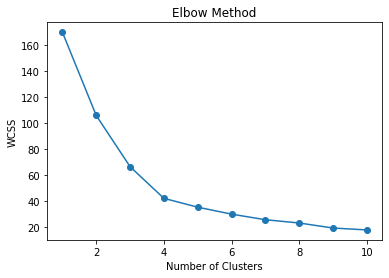

In [36]:
wcss = []

# Specify the range of cluster numbers to try
num_clusters_range = range(1, 11)

# Perform K-Means clustering for different numbers of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(num_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

we can see from the elbow method, for the best k is at 4

In [45]:
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(Xblobs)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the nearest centroid
    silhouette_scores.append(silhouette_score(Xblobs, kmeans.predict(Xblobs)))

best_k = k_values[np.argmax(silhouette_scores)]

# Print the results
print("---------------------------------------")
print("Silhouette scores:", silhouette_scores)
print("Best K:", best_k)

---------------------------------------
Silhouette scores: [0.588535055339124, 0.7326389535167752, 0.5896695935177027, 0.43760971195979287, 0.5793322530229854, 0.31782677540523446, 0.3100410675202131, 0.44866714167181454, 0.3292796577517758]
Best K: 3


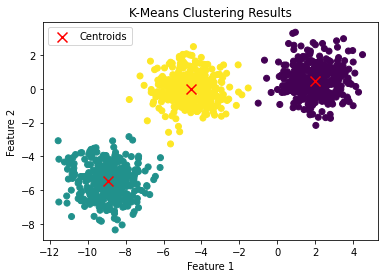

In [46]:
plt.scatter(Xblobs['Feature 1'], Xblobs['Feature 2'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

### *KMedoid*

In [48]:
# Create an instance of the KMedoids model
kmedoids = KMedoids(n_clusters=3)

# Fit the model to the data
kmedoids.fit(Xblobs)

# Get the cluster labels assigned to each data point
labels = kmedoids.labels_

# Get the cluster centers (medoids)
medoids = kmedoids.cluster_centers_

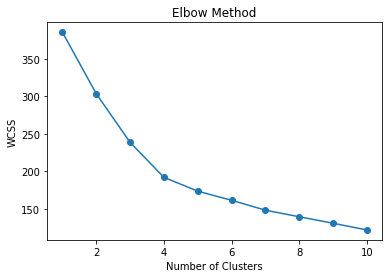

In [50]:
wcss = []

# Specify the range of cluster numbers to try
num_clusters_range = range(1, 11)

# Perform K-Means clustering for different numbers of clusters
for num_clusters in num_clusters_range:
    kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(num_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [53]:
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(Xblobs)
    wcss.append(kmedoids.inertia_)  # Sum of squared distances to the nearest centroid
    silhouette_scores.append(silhouette_score(Xblobs, kmedoids.predict(Xblobs)))

best_k = k_values[np.argmax(silhouette_scores)]

# Print the results
print("---------------------------------------")
print("Silhouette scores:", silhouette_scores)
print("Best K:", best_k)

---------------------------------------
Silhouette scores: [0.5622493907367931, 0.7326389535167752, 0.589546009214958, 0.5807710686991953, 0.44743800232195685, 0.4379861540309038, 0.44051988138413933, 0.41849508919484407, 0.43282841163003477]
Best K: 3


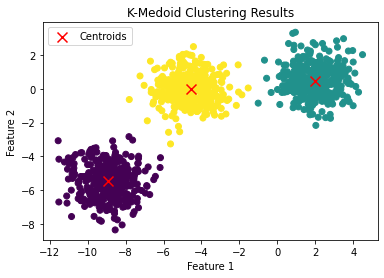

In [55]:
plt.scatter(Xblobs['Feature 1'], Xblobs['Feature 2'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoid Clustering Results')
plt.legend()
plt.show()

## 2. Density Based

In [9]:
from sklearn.cluster import DBSCAN, OPTICS

### *DBScan*

In [65]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan.fit(Xblobs)

# Get the cluster labels assigned to each data point
labels = dbscan.labels_

In [66]:
silhouette_avg = silhouette_score(Xblobs, labels)

# Print the Silhouette score
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.6829818328443941


No handles with labels found to put in legend.


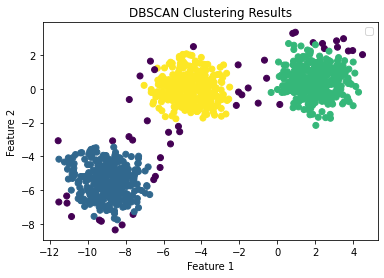

In [67]:
plt.scatter(Xblobs['Feature 1'], Xblobs['Feature 2'], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

### OPTICS

In [68]:
# Create an instance of the OPTICS algorithm
optics = OPTICS(min_samples=100)

# Fit the OPTICS algorithm to the data
optics.fit(Xblobs)

# Get the cluster labels assigned by OPTICS
labels = optics.labels_

In [69]:
silhouette_avg = silhouette_score(Xblobs, labels)

# Print the Silhouette score
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.5421319623761133


No handles with labels found to put in legend.


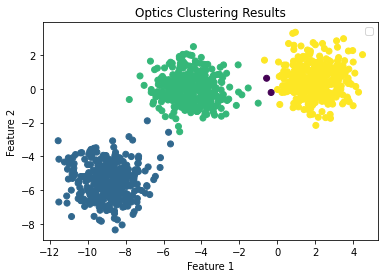

In [70]:
plt.scatter(Xblobs['Feature 1'], Xblobs['Feature 2'], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Optics Clustering Results')
plt.legend()
plt.show()

## 3. Hierarchical

In [10]:
from sklearn.cluster import Birch

In [71]:
birch = Birch(n_clusters=3)

# Fit the Birch algorithm to the data
birch.fit(Xblobs)

labels = birch.labels_

In [72]:
silhouette_avg = silhouette_score(Xblobs, labels)

# Print the Silhouette score
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.7324148481173909


No handles with labels found to put in legend.


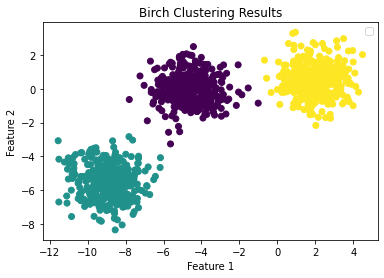

In [73]:
plt.scatter(Xblobs['Feature 1'], Xblobs['Feature 2'], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Birch Clustering Results')
plt.legend()
plt.show()

# Summary All Algorithm in All Data

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


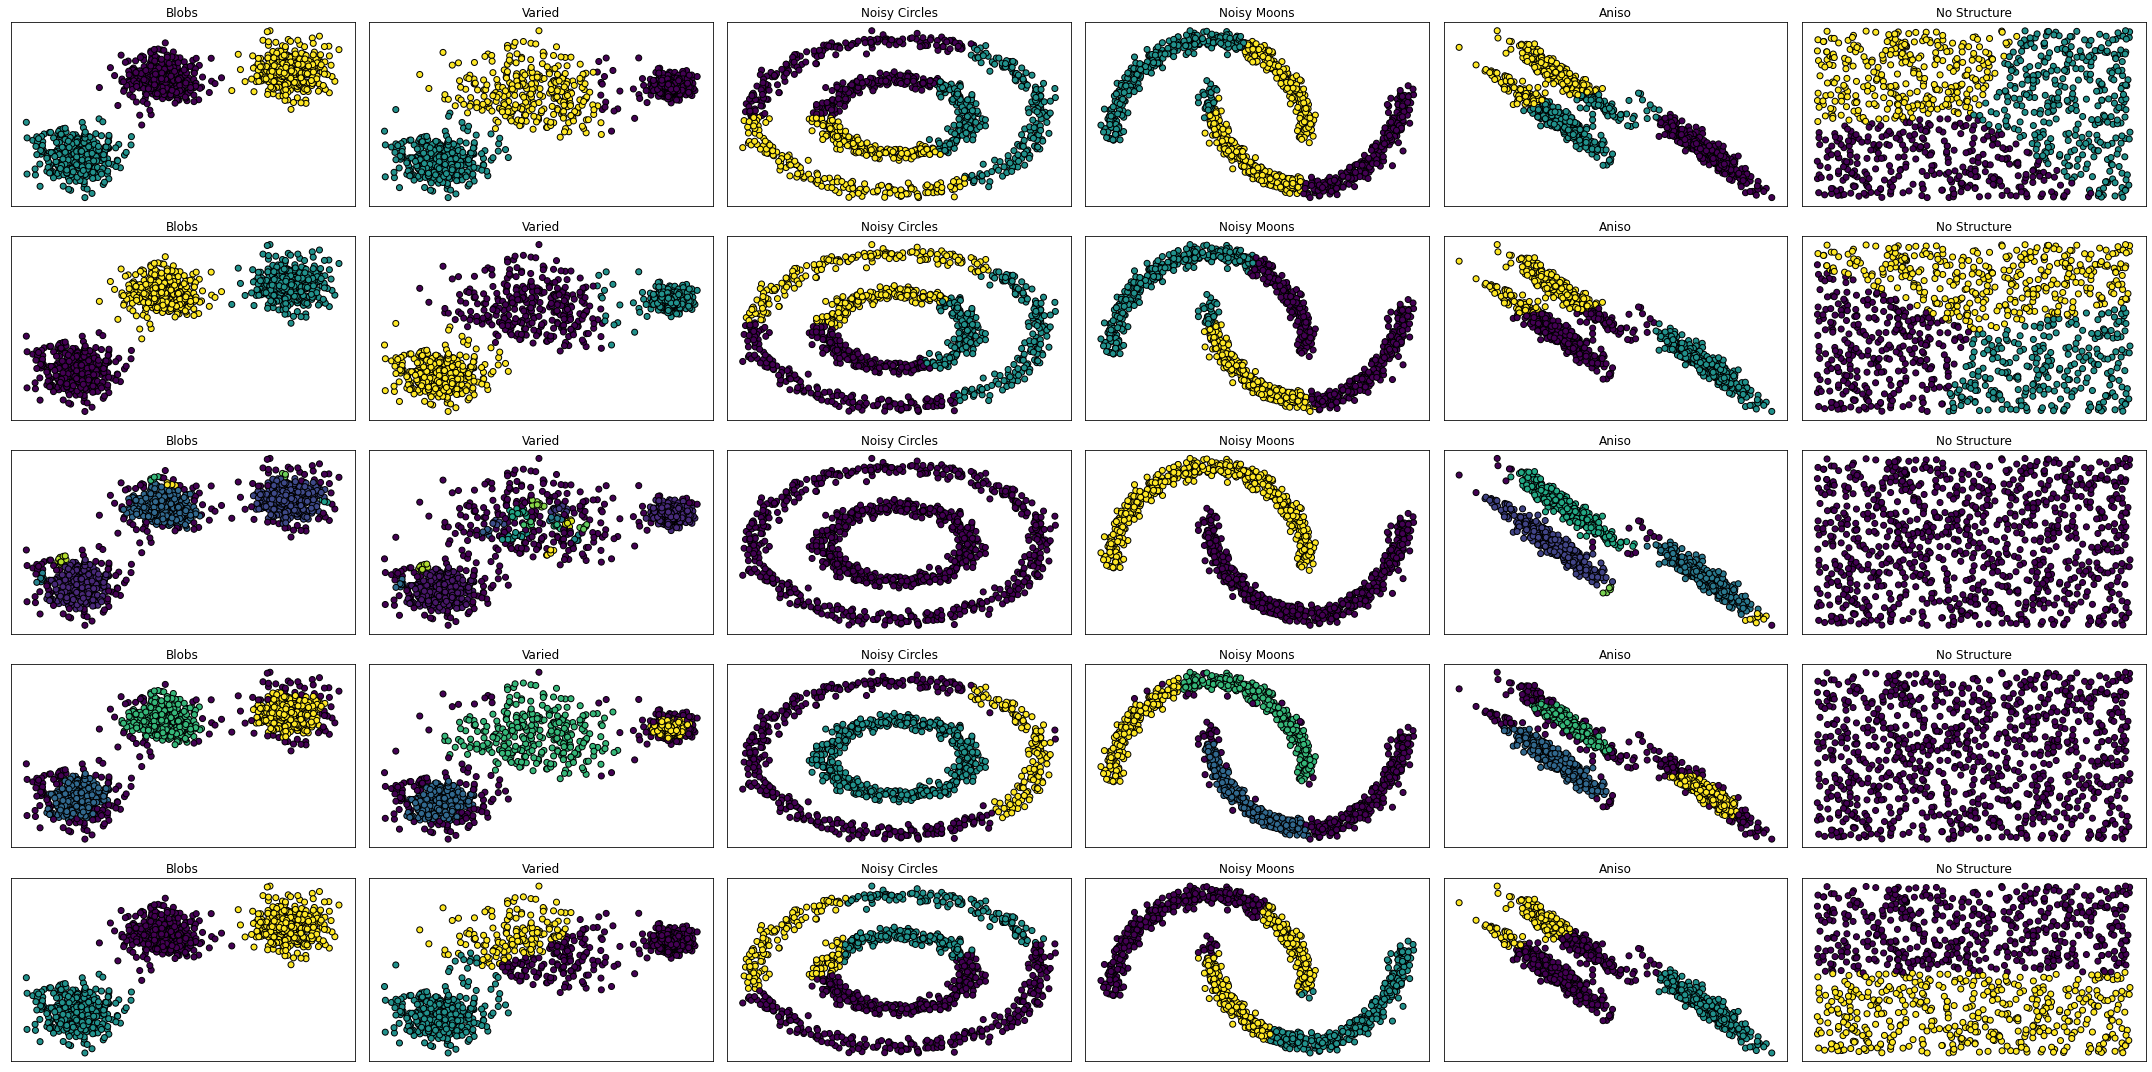

In [76]:
dataframes = [Xblobs, Xvaried, Xcircle, Xmoons, Xaniso, Xbox]

# Define the corresponding titles
titles = ['Blobs', 'Varied', 'Noisy Circles', 'Noisy Moons', 'Aniso', 'No Structure']

# Define the clustering algorithms
algorithms = [KMeans(n_clusters=3, n_init='auto' ), KMedoids(n_clusters=3), DBSCAN(eps=0.3, min_samples=5),
              OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1), Birch(n_clusters=3)]

# Plot the clusters for each dataframe and each algorithm
fig, axes = plt.subplots(len(algorithms), len(dataframes), figsize=(30, 15))

for i, algorithm in enumerate(algorithms):
    for j, dataframe in enumerate(dataframes):
        X = dataframe.values
        
        # Fit the clustering algorithm
        algorithm.fit(X)
        
        # Get the predicted cluster labels
        labels = algorithm.labels_
        
        # Plot the clusters
        ax = axes[i, j]
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
        ax.set_title(titles[j])
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()